Sentiment Analysis on test data

Import Library

In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt

Create a dataset

In [2]:
# Sample data
texts = ["I am happy", "I feel sad", "This is a joyful moment", "I'm feeling down"]

# Labels (1 for happy, 0 for sad)
labels = np.array([1, 0, 1, 0])

Clean the dataset

In [3]:
# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(texts)

# Pad sequences to have the same length
padded_sequences = pad_sequences(sequences)

Model building

In [4]:
# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=len(word_index) + 1, output_dim=16, input_length=padded_sequences.shape[1]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(padded_sequences, labels, epochs=10)



Epoch 1/10


1/1 [==============================] - 2s 2s/step - loss: 0.6930 - accuracy: 0.5000
Epoch 2/10
1/1 [==============================] - 0s 19ms/step - loss: 0.6885 - accuracy: 0.5000
Epoch 3/10
1/1 [==============================] - 0s 21ms/step - loss: 0.6841 - accuracy: 0.7500
Epoch 4/10
1/1 [==============================] - 0s 16ms/step - loss: 0.6799 - accuracy: 0.7500
Epoch 5/10
1/1 [==============================] - 0s 17ms/step - loss: 0.6758 - accuracy: 0.7500
Epoch 6/10
1/1 [==============================] - 0s 15ms/step - loss: 0.6717 - accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 0s 19ms/step - loss: 0.6675 - accuracy: 1.0000
Epoch 8/10
1/1 [==============================] - 0s 19ms/step - loss: 0.6636 - accuracy: 1.0000
Epoch 9/10
1/1 [==============================] - 0s 17ms/step - loss: 0.6597 - accuracy: 1.0000
Epoch 10/10
1/1 [==============================] - 0s 16ms/step - loss: 0.6558 - accuracy: 1.0000


In [5]:
# Test the model with new data
test_texts = ["I am feeling great", "This is a sad situation"]
test_sequences = tokenizer.texts_to_sequences(test_texts)
padded_test_sequences = pad_sequences(test_sequences, maxlen=padded_sequences.shape[1])

predictions = model.predict(padded_test_sequences)
predicted_labels = [1 if pred > 0.5 else 0 for pred in predictions]

print("Predictions:", predictions)
print("Predicted Labels:", predicted_labels)

1/1 [==============================] - 0s 151ms/step
Predictions: [[0.49765274]
 [0.48688647]]
Predicted Labels: [0, 0]


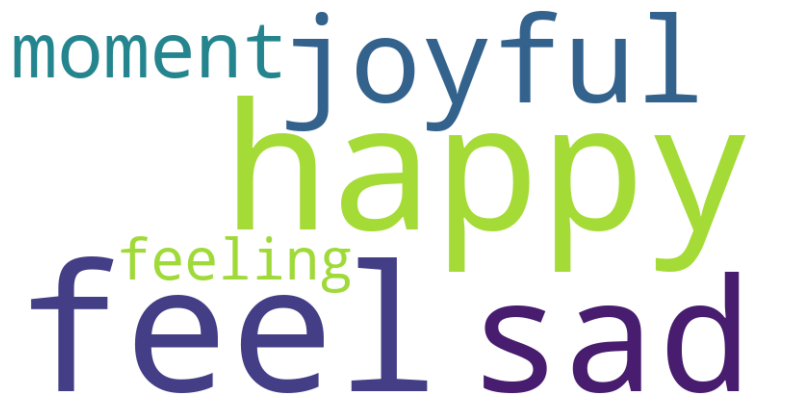

In [8]:
# Generate a WordCloud from the original text
all_text = ' '.join(texts)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis labels
plt.show()